In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data

In [2]:
goog = data.DataReader('GOOG', start='2004', end='2018', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [3]:
goog_p = goog['Adj Close']

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
import seaborn; seaborn.set_style('whitegrid')

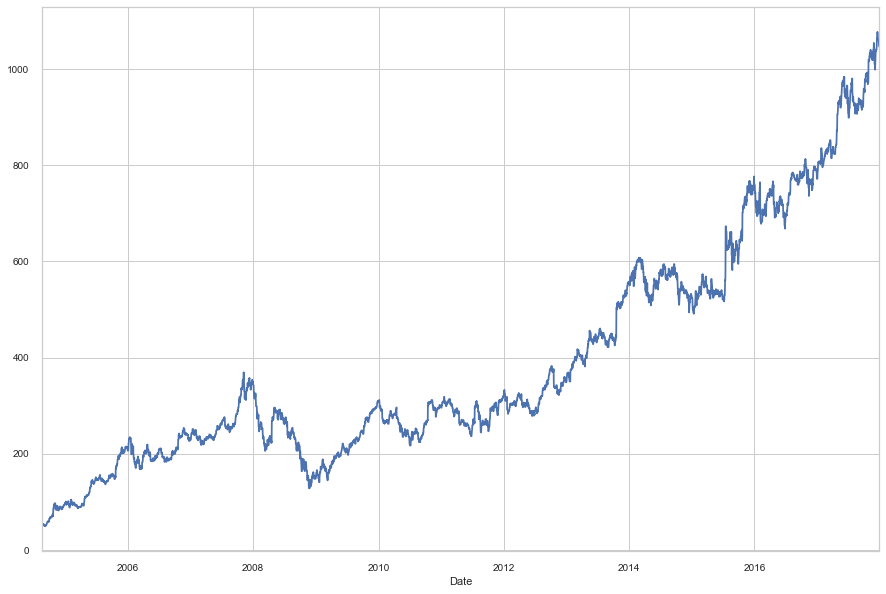

In [21]:
goog_p.plot(figsize=(15,10))

## Compute Yearly Return
A common context for financial timeseries data is computing difference over time. For example, we can calculate one-year returns using pandas.

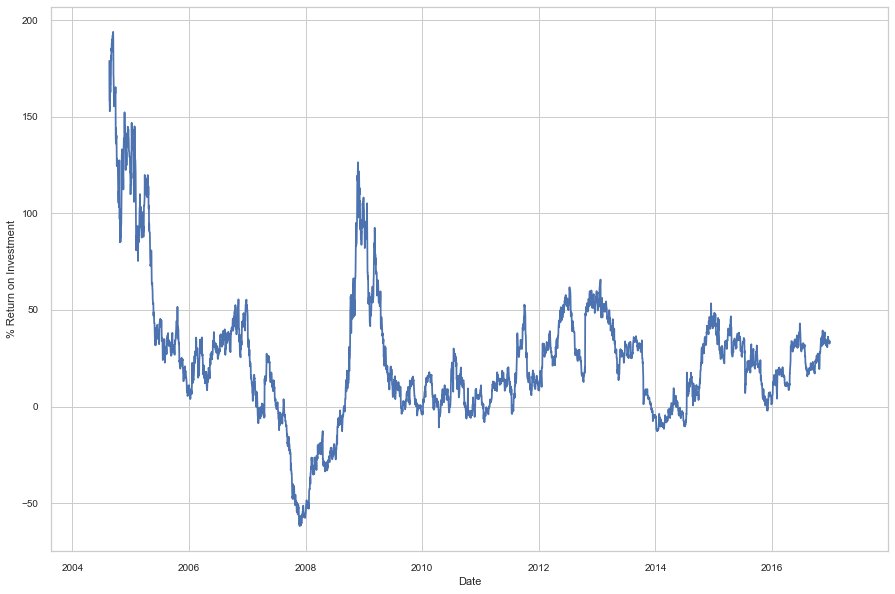

In [25]:
goog_p = goog_p.asfreq('D', method='pad')    
ROI = 100 * (goog_p.tshift(-365)/goog_p - 1)

ROI.plot(figsize=(15, 10))
plt.ylabel('% Return on Investment');

In [26]:
y1_return = goog['Adj Close'].pct_change().rolling(365).sum().dropna()
y1_vol = goog['Adj Close'].pct_change().rolling(365).std().dropna()

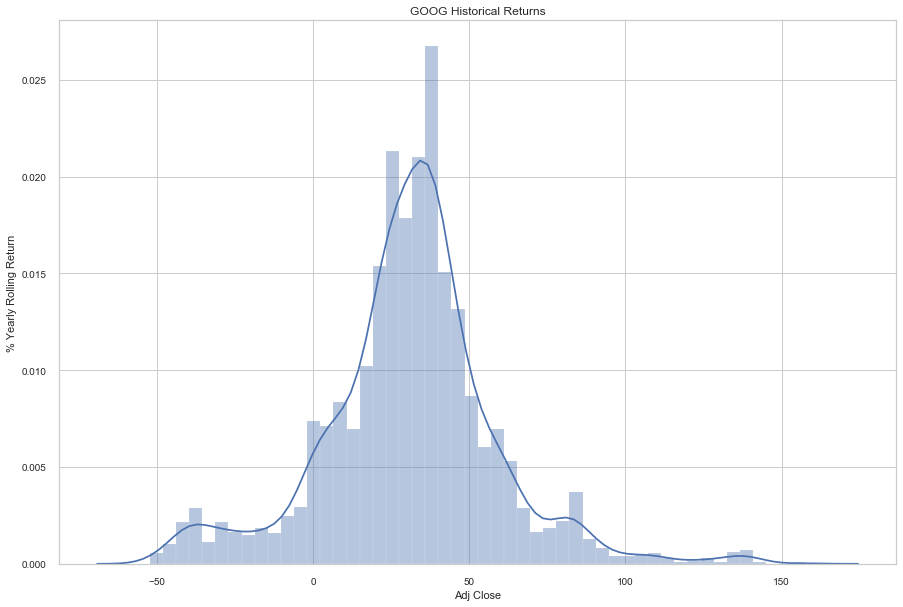

In [27]:
plt.figure(figsize=(15, 10))
seaborn.distplot(y1_return*100)
plt.ylabel('% Yearly Rolling Return')
plt.title('GOOG Historical Returns');